In [1]:
import numpy as np

class LinearRegression:
    """ 
        Implemntation of Linear Regression Using:
        1) Gradient Descent (Default: [alpha = 0.01, iterations = 100])
        2) Normal Equation to find global optima directly

        For using normal equation methods, the prefix "normal_equation_" is added to each method

        Function list:
        i) normal_equation_fit(self, X, y):
            X - Training examples
            y - Training features

        ii) fit(self, X, y):
            X - Training examples
            y - Training features

        iii) predict(self, X):
            X - Testing examples

        iv) normal_predict(self, X):
            X - Testing examples
    """
    def __init__(self, alpha = 0.01 , iterations = 100):
        self.alpha = alpha
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def normal_equation_fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])] # Add a column of 1s in order to match the matrix multiplication dimensionality constraints
        try:
            self.weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        except np.linalg.LinAlgError:
            print("Non-invertable matrix formation, normal method invalid!")
        self.bias = np.random.randn()

    def fit(self, X, y):
        number_of_examples, number_of_features = X.shape
        self.weights = np.random.randn(number_of_features)
        self.bias = np.random.randn()

        for _ in range(self.iterations):

            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/number_of_examples) * 2 * np.dot(X.T, (y_predicted - y))
            db = (1/number_of_examples) * 2 * np.sum(y_predicted - y)

            self.weights -= self.alpha * dw
            self.bias -= self.alpha * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def normal_equation_predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])] # See- normal_equation_fit(self, X, y) method
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted    

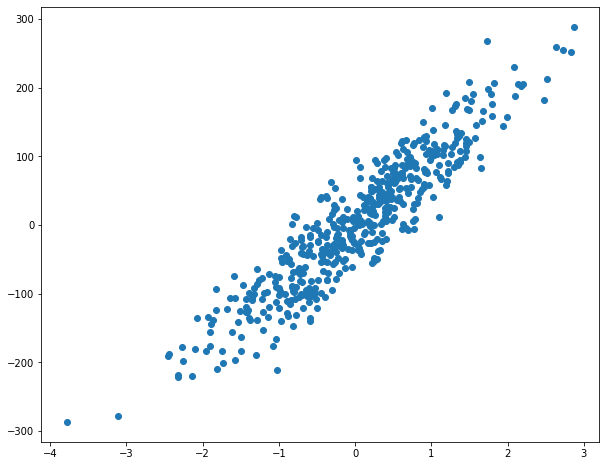

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples = 500, n_features = 1, noise = 35)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

fig = plt.figure(figsize = (10, 8) )
plt.scatter(X[:, 0], y)
plt.show()

Error : 1959.779936016589


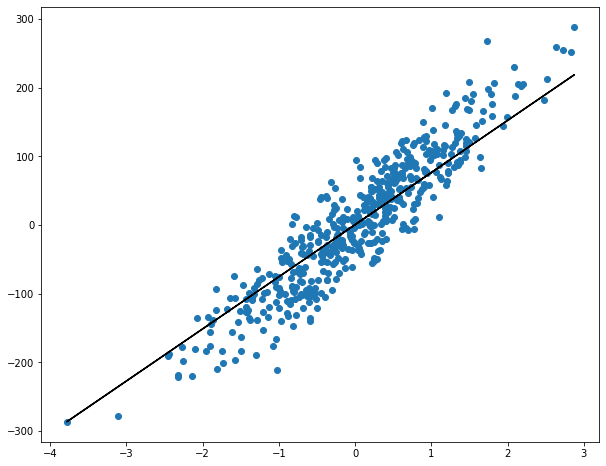

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)
result = model.predict(X_test)

prediction_line = model.predict(X)
fig = plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(X, prediction_line, color = "black")
print("Error : {}".format(np.mean( (y_test - result)**2 )))

Error : 1602.695569298973


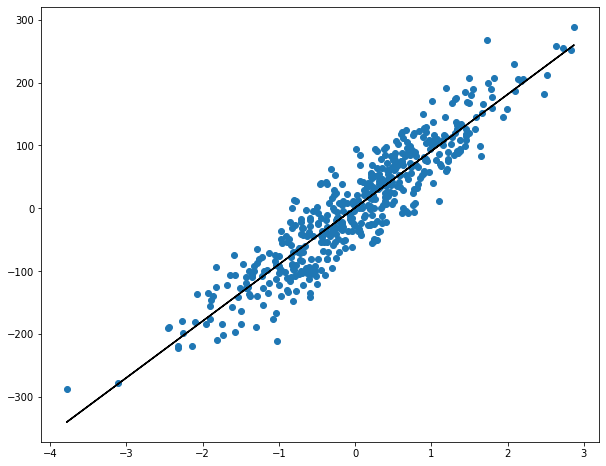

In [4]:
model = LinearRegression()
model.normal_equation_fit(X_train, y_train)
result = model.normal_equation_predict(X_test)

prediction_line = model.normal_equation_predict(X)
fig = plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(X, prediction_line, color = "black")
print("Error : {}".format(np.mean( (y_test - result)**2 )))